# LSE Machine Learning: Practical Applications
## Module 1 Unit 2 IDE Activity (Practice)
### In this activity you have the opportunity to practise the methods of importing data into R, fixing issues, and generating plots.
As you complete this activity, you are required to read the text cells throughout the notebook and then run each code cell that follows. Be mindful of the syntax used to execute certain functionalities within R to produce a desired result. In completing this activity, you should gain the necessary practical skills to complete the IDE activity (assessment) that follows.

# Section A: Creating basic variables in R

In most cases, existing data sets are imported into R and used to generate an output. However, it may be useful to get a basic understanding of how to create different variables in R. The first illustration is the creation of a scalar variable.

In [1]:
# Create scalar variable
a <- 1
a

[1] 1

A vector variable can also be created.

In [2]:
# Create vector variable
b <- c(1, 2, 3, 4)
b

[1] 1 2 3 4

A slightly more complex variable is the matrix. There are different methods of creating a matrix, depending on the types of data in question. The most basic matrix variable is illustrated below.

In [3]:
# Create matrix variable
c <- matrix(b, 2, 2)
c

1,3
2,4


The next illustration is an alternative way of creating a matrix variable using the `bind` function. This example uses a vector, *d*, and a vector, *e*, and binds them into a matrix, *f*.

In [4]:
# Alternative way to create matrix variable
d <- c(1, 2)
e <- c(3, 4)
f <- cbind(d, e)
f

d,e
1,3
2,4


In the event that mixed data is used, a different method is used to create a matrix with the varied types of data. 

In [5]:
# Create matrix of mixed data
d <- c(1, 4, 8)
e <- c("Hello", "Goodbye", "Welcome")
f <- cbind(d, e)
f

d,e
1,Hello
4,Goodbye
8,Welcome


As mentioned in the Unit 2 notes, the `data frame` function in R creates a collection of variables with varied properties, matrices, and lists. The data frame allows for a combination of numbers, categories, and classes in one variable.

In [6]:
# Create data frame of mixed data
f <- data.frame(d, e)
f

d,e
<dbl>,<fct>
1,Hello
4,Goodbye
8,Welcome


When a data frame has been created, a specific column in the data frame can be selected to generate the output. 

In [7]:
# Choose specific data frame column
f$d

[1] 1 4 8

In [8]:
# Choose another data frame column
f$e

[1] Hello   Goodbye Welcome
Levels: Goodbye Hello Welcome

In this cell, the command translates into the following: From *f*, select Column D. 

# Section B: Loading packages in R

Before importing data into R, it is important to first load the relevant packages that will be used. In the following example, data.table, tidyverse, DT, naniar, and dplyr are loaded, all with different funcionalities that will be used later in this IDE activity.

In [9]:
# Install packages
# install.packages(c("data.table", "tidyverse", "DT", "naniar" , "dplyr"))
# Required packages are already installed

After the packages have been installed, they are then loaded.

The data.table package is used to import data.

In [10]:
library(data.table)

The tidyverse package is used to manipulate and visualise data.

In [11]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



The DT package is used to view data in a table format.

In [12]:
library(DT)

The naniar package is used to deal with missing values in data.

In [13]:
library(naniar)

The dplyr package is used for data processing and analysis.

In [14]:
library(dplyr)

# Section C: Importing data into R

After loading the relevant packages, the data can be imported into R. The data is usually in a CSV file format, as seen in Row 2 of the code cell below. The data is then imported using either the `base` function, the `fread` function, or the `read` function. In this example, the `fread` function is used to import the automobile bodily injuries claims data set. In this example, the data set is titled "auto". The `head` function is then used to display the first few entries in the data set.

In [15]:
# Read data
auto <- fread("AUTO.csv")
column.names <- c("id", "attorney", "gender", "marital", "insured", "seatbelt", "age", "loss")
setnames(auto, column.names)
head(auto)

id,attorney,gender,marital,insured,seatbelt,age,loss
<int>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,1,2,2,2,1,1.8,6.38
NA,NA,,,NA,NA,NA,NA
2,2,2,1,2,1,5.6,0.95
NA,NA,,,NA,NA,NA,NA
3,1,1,2,2,1,1.4,1.88
NA,NA,,,NA,NA,NA,NA


Once the data has been imported, specific columns can be selected for specific actions. In the first code cell below, the columns labelled as "attorney" and "insured" respectively, are extracted from the data set.

In [16]:
# Determine column numbers
column_number <- auto[, which(colnames(auto) == "attorney" | colnames(auto) == "insured")]
column_number

[1] 2 5

In [17]:
# Choose specific columns
a <- auto[, c(2,5)]
head(a)

attorney,insured
<int>,<int>
1,2
NA,NA
2,2
NA,NA
1,2
NA,NA


The dplyr package can also be used to select specific columns from the data set.

In [18]:
# Choose specific columns using dplyr
a <- auto %>% select(attorney, insured)
head(a)

attorney,insured
<int>,<int>
1,2
NA,NA
2,2
NA,NA
1,2
NA,NA


# Section D: Cleaning data

From the Unit 2 notes, it should be clear that the quality of data has a significant impact on the accuracy of the output. Cleaning the data is therefore essential prior to generating outputs. There are various issues that can present themselves within a data set, such as unwanted observations, structural errors, unwanted outliers, missing data, and duplicate data. In the next example, two different methods for removing missing data are illustrated. Note that this step is relatively standard for any analysis. In most of the future IDE activities, you will not be required to execute this step.

In [30]:
# Find and remove NAs
na_strings <- c("NA", "N A", "N / A", "N/A", "N/ A", "Not Available", "Not available")
auto <- auto %>% replace_with_na_all(condition = ~.x %in% na_strings)
auto <- na.omit(auto)

Another issue with this data set is duplicate entries. These entries should also be removed, as they affect the accuracy of the output. The removal of duplicates is shown in the following code cell.

In [20]:
# Remove duplicates
auto <- auto %>% distinct()

# Section E: Visualising data

When all missing values have been removed, the data can be visualised in a data table.

In [21]:
# Visualise data table
datatable(auto, options = list(scrollX = TRUE, searching = FALSE, pageLength = 5), caption = 'Table 1: Raw Auto Data')

HTML widgets cannot be represented in plain text (need html)

In the preceding code cell, the `scrollx` function allows for horizontal scrolling within the data, whereas the `searching` function makes specific elements or variables searchable.

# Section F: Transforming data

In instances where input data is represented as a factor of, for example, 1 or 2, that factor can be transformed into character variables. In Table 1, which contains the metadata of the given data set, five of the eight variables have been translated into factors. This tool is therefore useful to translate those factors into the representative characters. 

In [29]:
# Transform factors into character variables
head(auto$gender)
auto.clean <- auto %>%
            as_tibble %>%
            mutate(attorney = factor(attorney, labels = c("yes", "no"))) %>%
            mutate(gender = factor(gender, labels = c("male", "female"))) %>%
            mutate(marital = factor(marital, labels = c("married", "single", "widowed", "divorced"))) %>%
            mutate(insured = factor(insured, labels = c("yes", "no"))) %>%
            mutate(seatbelt = factor(seatbelt, labels =  c("yes", "no"))) %>%
            select(-id)
head(auto.clean$gender)

[1] "2" "2" "1" "1" "2" "2"

[1] female female male   male   female female
Levels: male female

If only certain variables should be considered to generate the output, a filter function can be applied to include only the chosen variables. For example, you may only want to use married, male individuals to generate an output.

In [23]:
# Filter by gender = male and marital = married
auto.clean.male.married <- auto.clean %>% 
            filter(gender == "male", marital == "married")  
datatable(auto.clean.male.married, 
          options = list(scrollX = TRUE, searching = FALSE, pageLength = 5), 
          caption = 'Table 2: Married, Male Auto Data')

HTML widgets cannot be represented in plain text (need html)

# Section G: Plots

Before plotting data, it is a good idea to generate summary statistics. Summary statistics is a function in R used to generate a data table that sets out the different variables to make the data easy to read. By presenting the data in this format, further issues, such as identifying outliers, can be detected. For numerical variables, this populates the minimum, maximum, mean, median, and first and third quartiles of the variables.

In [24]:
# Generate summary statistics
summary(auto.clean)

 attorney     gender        marital    insured    seatbelt        age        
 yes:681   male  :559   married :655   yes: 111   yes:1310   Min.   : 0.100  
 no :651   female:773   single  :629   no :1221   no :  22   1st Qu.: 1.800  
                        widowed : 14                         Median : 3.350  
                        divorced: 34                         Mean   : 5.541  
                                                             3rd Qu.: 7.000  
                                                             Max.   :62.200  
      loss       
 Min.   :  0.01  
 1st Qu.:  0.63  
 Median :  2.00  
 Mean   :  5.69  
 3rd Qu.:  5.43  
 Max.   :341.72  

Now the data is ready to be visualised. If the desired result is to identify distributions from numerical values, a histogram is suitable. In this example, the numerical value used is age, which refers to the number of years an individual has been in possession of a driver's licence for.

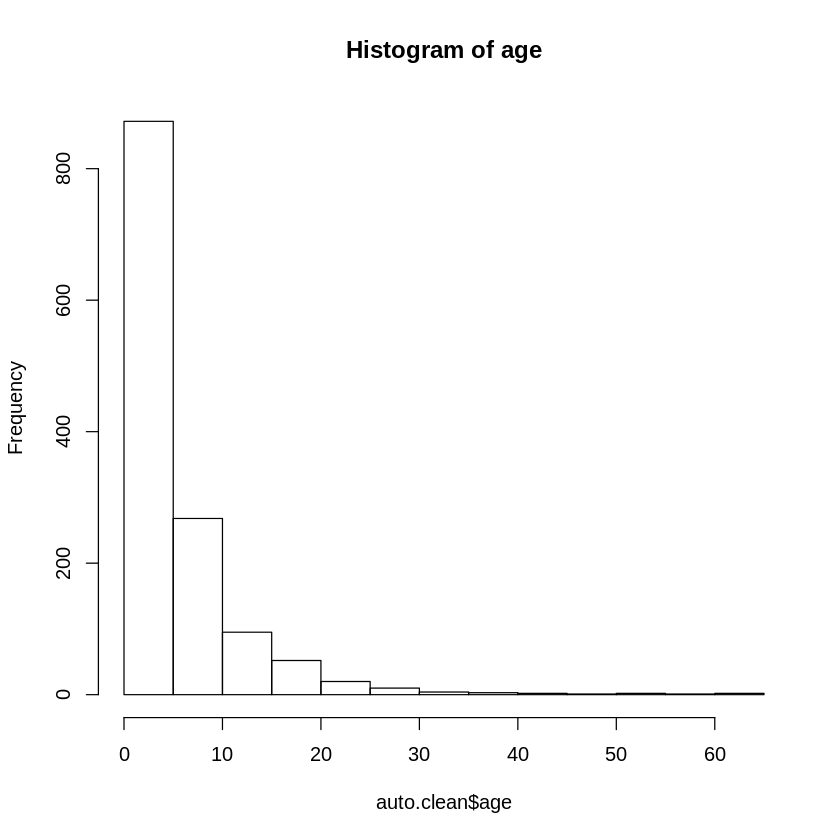

In [25]:
# Create histogram
hist(auto.clean$age,main="Histogram of age")

The histogram works best for numerical values. In this histogram, it can be seen that the majority of the claimants have had their licence for 20 years or less.

The bar chart, on the other hand, provides insight into the different classes contained in a data set consisting of categorical values.

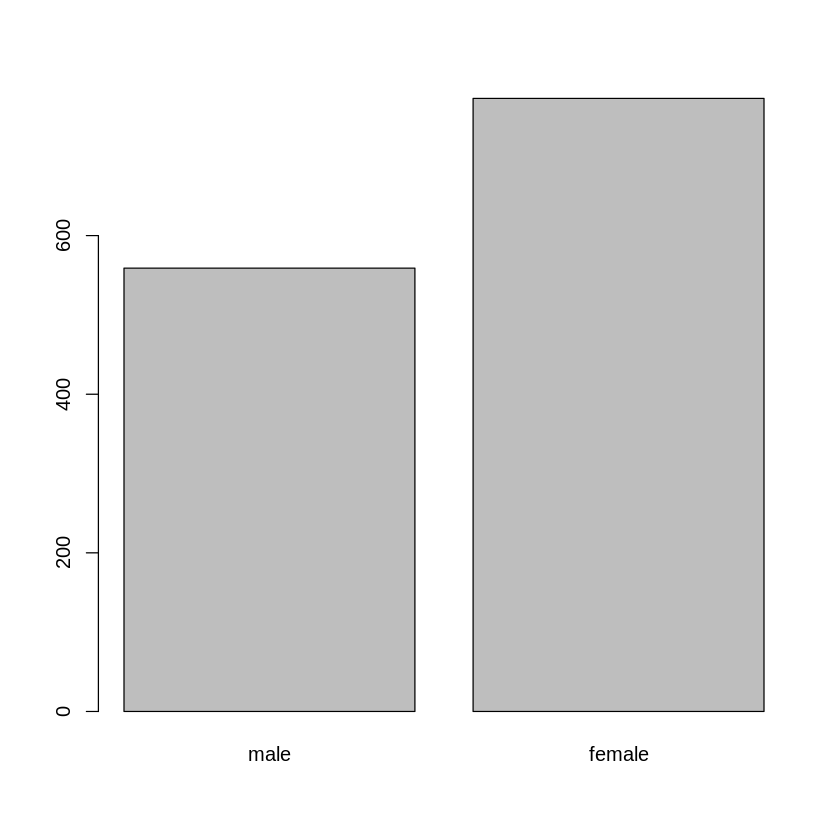

In [26]:
# Create bar chart
plot(auto.clean$gender)

In this bar chart, it can be seen how the code cell splits the gender of the claimants into two groups: male and female. By splitting the variables into these two categories, it appears that the majority of the claimants were female.

In instances where there are two numerical variables, a scatterplot is useful to determine the relationship between the variables.

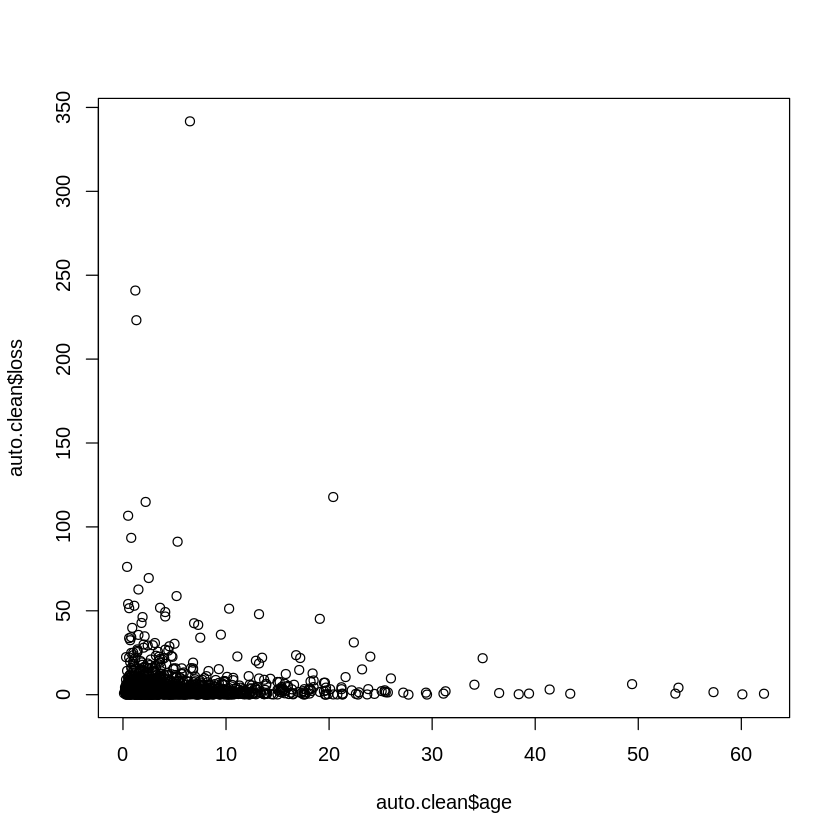

In [27]:
# Create scatterplot
plot(auto.clean$age, auto.clean$loss)

A box plot can be used to determine how a category affects a numerical value. In this case, gender and age are shown.

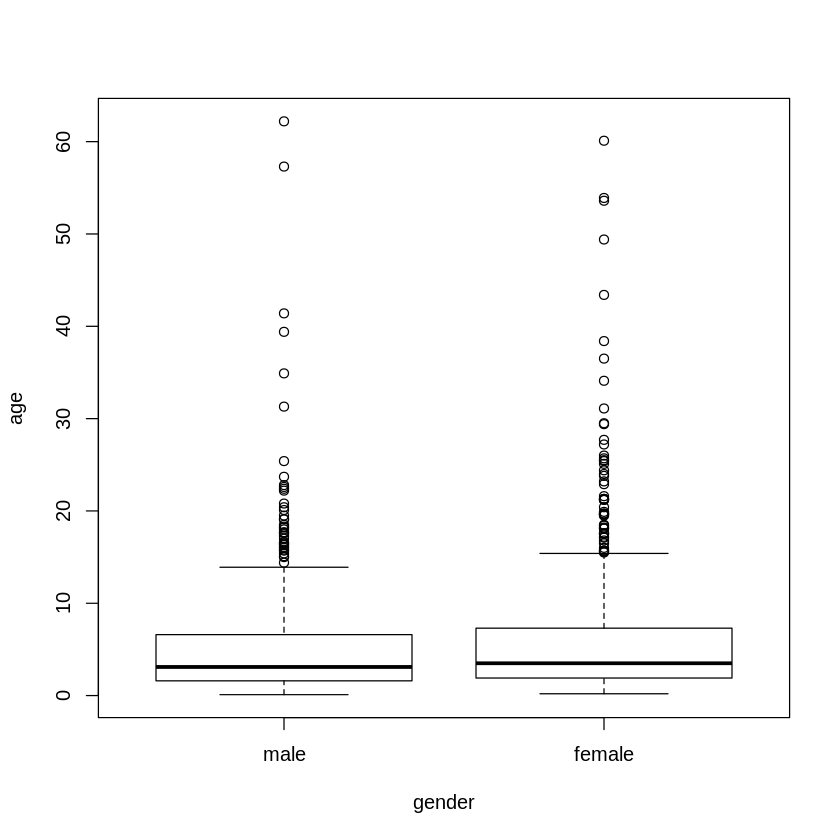

In [28]:
# Create box plot
boxplot(age ~ gender, data = auto.clean)

The box plot depicted above shows that the majority of the claimants' ages (the number of years they have had a driver's licence for) fall within the section shown by the rectangular box. In this case, most of the claimants have had their licence for less than 10 years.

Now that you understand the basics of R, specifically, importing data, cleaning data, and generating appropriate visualisations, consider how each of these steps assists in transforming data from its raw form into visualisations that can be used to make inferences for various reasons. Now that you have had the opportunity to practise these different steps in this practice IDE activity, navigate to the IDE activity (assessment) in the next component to replicate some of these steps on a new data set.